<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS422 Assignment 04:

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Data Dictionary Titanic Dataset


<br>
   
| Variable        | Description                        |  Details                  |  
| :---            |    :----:                          |     :----:                |   
| Survival        | Survival                           | 0 = No; 1 = Yes           |    
| pclass          | Passenger Class                    | 1 = 1st; 2 = 2nd; 3 = 3rd |     
| name            | First and Last Name                |                           |
| sex             | Sex                                |                           |	 
| age             | Age                                |                           | 	 
| sibsp 	  | Number of Siblings/Spouses Aboard  |                           | 	 
| parch           | Number of Parents/Children Aboard  |                           |
| ticket 	  | Ticket Number 	               |                           |
| fare 	          | Passenger Fare 	               |                           |
| cabin 	  | Cabin 	                       |                           | 
| embarked 	  | Port of Embarkation 	       |C = Cherbourg; Q = Queenstown; S = Southampton |
    

## Import packages 



In [64]:
import numpy as np 
import pandas as pd 
from math import sqrt

from sklearn.metrics import classification_report
import statsmodels.formula.api as sm
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # Random Forest package
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees package

from sklearn.metrics import mean_squared_error, r2_score ,make_scorer, accuracy_score, roc_auc_score, roc_curve 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import scikitplot as skplt
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
np.random.seed(42)

In [65]:
%matplotlib inline

In [66]:
np.set_printoptions(precision=4)

<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [67]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Enviorment

In [68]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Load Data (Local Directory)

In [69]:
training_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [70]:
full = training_df.append( test_df , ignore_index = True )

### Data Quality Review 

In [71]:
print("Shape:", training_df.shape,"\n")
print("Variable Types:") 
print(training_df.dtypes)

Shape: (891, 12) 

Variable Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [72]:
print("Shape:", test_df.shape,"\n")
print("Variable Types:") 
print(test_df.dtypes)

Shape: (418, 11) 

Variable Types:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [73]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploritory Data Analysis (EDA) 

### Review Training and Test Dataset for Missing Values

In [74]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row for each column number of records
</div> 

In [76]:
training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


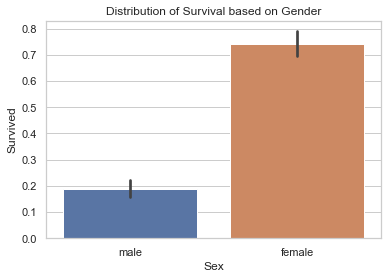

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [77]:
sns.barplot(x="Sex", y="Survived", data=training_df)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training_df[training_df.Sex == "female"]["Survived"].sum()
total_survived_males = training_df[training_df.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

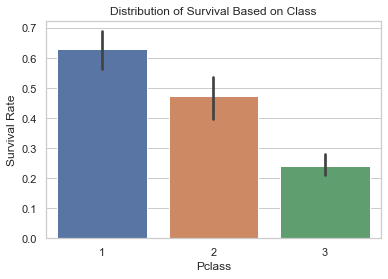

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [78]:
sns.barplot(x="Pclass", y="Survived", data=training_df)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training_df[training_df.Pclass == 1]["Survived"].sum()
total_survived_two = training_df[training_df.Pclass == 2]["Survived"].sum()
total_survived_three = training_df[training_df.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

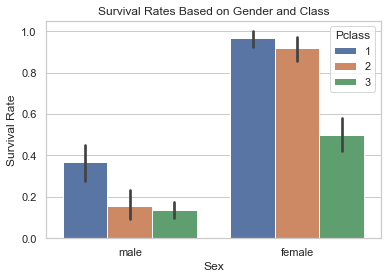

In [79]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

### Correlation Heatmap

<div class="alert alert-block alert-info">
<b>Seaborn Heatmap Documentation</b><br>
https://seaborn.pydata.org/generated/seaborn.heatmap.html
</div>

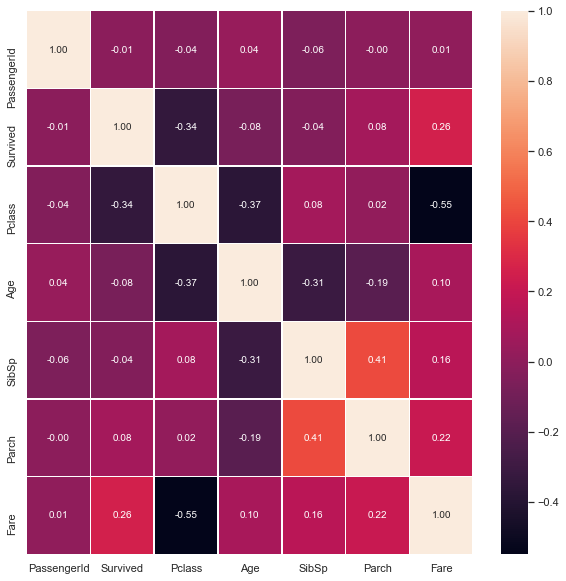

In [80]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(training_df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

## Preprocess Data for Analysis

### Fix Missing Values, Feature  Engineering

#### Encode Gender Male = 1, Female = 0

In [81]:
sex_map={"male":1,"female":0}
training_df["Sex"]=training_df["Sex"].map(sex_map)
test_df["Sex"]=test_df["Sex"].map(sex_map)

In [82]:
training_df["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

Passenger Class<b> (Pclass)</b> and Number of Siblings<b> (SibSp)</b> provide insights into the social-economic status differences. The <b>Age</b> of the passenger will be imputed by median age of each sub-group

### Training Dataset

In [83]:
training_df1=training_df.groupby(["Pclass","SibSp"])
training_df1_median=training_df1.median()
training_df1_median

PassengerId  Survived  Sex   Age  Parch      Fare
Pclass SibSp                                                   
1      0            476.0       1.0  1.0  37.0    0.0   39.6000
       1            485.0       1.0  0.0  38.0    0.0   79.2000
       2            572.0       1.0  0.0  44.0    0.0  133.6500
       3             89.0       1.0  0.0  23.0    2.0  263.0000
2      0            407.0       0.0  1.0  30.0    0.0   13.0000
       1            451.0       1.0  0.0  29.0    1.0   26.0000
       2            565.5       0.5  1.0  23.5    1.0   39.0000
       3            727.0       1.0  0.0  30.0    0.0   21.0000
3      0            472.0       0.0  1.0  26.0    0.0    7.8958
       1            372.0       0.0  1.0  25.0    0.0   15.5500
       2            334.0       0.0  1.0  19.5    0.0   19.2583
       3            302.5       0.0  0.0   6.0    1.0   25.4667
       4            264.5       0.0  1.0   6.5    1.5   31.2750
       5            387.0       0.0  1.0  11.0    2.0   46.9000
       8            325.0       0.0  1.0   NaN    2.0   69.5500

### Test Dataset

In [84]:
test_df1=test_df.groupby(["Pclass","SibSp"])
test_df1_median=test_df1.median()
test_df1_median

PassengerId  Sex   Age  Parch       Fare
Pclass SibSp                                          
1      0           1088.0  1.0  39.0    0.0   42.50000
       1           1109.5  0.5  46.0    0.0   82.06250
       2            969.0  0.0  55.0    0.0   51.47920
       3            945.0  0.0  28.0    2.0  263.00000
2      0           1117.5  1.0  27.0    0.0   13.00000
       1           1139.0  1.0  29.0    0.0   26.00000
       2           1077.5  0.5  21.0    0.5   31.50000
3      0           1095.5  1.0  24.0    0.0    7.82920
       1           1084.0  0.0  20.0    1.0   15.24580
       2           1059.0  1.0  19.5    0.0   21.67920
       3           1281.0  1.0  29.0    1.0   21.07500
       4           1076.0  1.0  11.5    2.0   30.25625
       5           1032.0  0.0  10.0    2.0   46.90000
       8           1166.0  0.5  14.5    2.0   69.55000

### Function - Impute Age

In [85]:
def impute_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median() 

In [86]:
training_df["Age"]=training_df["Age"].fillna(impute_age(training_df,training_df1_median))
test_df["Age"]=test_df["Age"].fillna(impute_age(test_df,test_df1_median))

In [87]:
print(training_df.isnull().sum()), print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


(None, None)

### Fix Missing Values Cabin

Missing Values will be filled by "U" = Unknown

In [88]:
training_df["Cabin"]=training_df["Cabin"].fillna("U")
test_df["Cabin"]=test_df["Cabin"].fillna("U")
training_df["Cabin"]=training_df["Cabin"].map(lambda x: x[0])
test_df["Cabin"]=test_df["Cabin"].map(lambda x: x[0])

In [89]:
training_df["Cabin"].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [90]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [91]:
training_df.shape

(891, 12)

In [92]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [94]:
training_df['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### Function - Cabin Assignment 
If passenger assigned to cabin "1" and "0" if passenger is not assigned

In [95]:
def cabin_assignment(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0) 
    dataset["Cabin U"]=np.where(dataset["Cabin"]=="U",1,0) 

In [96]:
cabin_assignment(training_df)
cabin_assignment(test_df)

In [97]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin A      891 non-null    int32  
 13  Cabin B      891 non-null    int32  
 14  Cabin C      891 non-null    int32  
 15  Cabin D      891 non-null    int32  
 16  Cabin E      891 non-null    int32  
 17  Cabin F      891 non-null    int32  
 18  Cabin G      891 non-null    int32  
 19  Cabin T 

In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Cabin A      418 non-null    int32  
 12  Cabin B      418 non-null    int32  
 13  Cabin C      418 non-null    int32  
 14  Cabin D      418 non-null    int32  
 15  Cabin E      418 non-null    int32  
 16  Cabin F      418 non-null    int32  
 17  Cabin G      418 non-null    int32  
 18  Cabin T      418 non-null    int32  
 19  Cabin U 

### Fix Missing Values Embarked

Embarked has 2 missing values in training dataset

In [99]:
training_df["Embarked"]=training_df["Embarked"].fillna("S")

In [100]:
training_df["Embarked"].isnull().sum()

0

### Function - Embarked Location 
If passenger embarked from location assigned "1" and "0" if passenger is did not embark from location 

In [101]:
def embark_assignment(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0) 
    dataset["Embarked Q"]=np.where(dataset["Embarked"]=="Q",1,0) 

NOTE: Embarked on Q is when the rest of embarked are 0

In [102]:
embark_assignment(training_df)
embark_assignment(test_df)

In [103]:
training_df['Pclass'] = training_df['Pclass'].astype(object)
test_df['Pclass'] = test_df['Pclass'].astype(object)

In [104]:
def p_class(dataset):
    dataset["Pclass_2"]=np.where(dataset["Pclass"]=='2',1,0)
    dataset["Pclass_3"]=np.where(dataset["Pclass"]=='3',1,0) 
    dataset["Pclass_1"]=np.where(dataset["Pclass"]=='1',1,0) 

In [105]:
p_class(training_df)
p_class(test_df)

# extract titles

title = pd.DataFrame()
# we extract the title from each name
title[ 'Title'] =fulll['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip())

title['Title']. value_counts()



# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Special",
                    "Col":        "Special",
                    "Major":      "Special",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Special",
                    "Rev":        "Special",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )
title = pd.get_dummies( title.Title )
#title = pd.concat( [ title , titles_dummies ] , axis = 1 )

title.head()

In [109]:
training_df[ 'Title'] =training_df['Name'].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip())

In [ ]:
Title_Dictionary = {
                    "Capt":       "Special",
                    "Col":        "Special",
                    "Major":      "Special",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Special",
                    "Rev":        "Special",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

In [110]:
training_df[ 'Title' ] = training_df.Title.map( Title_Dictionary )

In [ ]:
training_df[ 'Title' ].value_counts()

In [112]:
training_dft = pd.get_dummies( training_df[ 'Title' ] )

In [113]:
training_df =  pd.concat([training_df, training_dft], axis=1)

### Fix Missing Values Fare

In [114]:
test_df["Fare"]=test_df["Fare"].fillna(np.mean(test_df["Fare"]))

In [115]:
test_df["Fare"].isnull().sum()

0

### Feature Engineering - Family Size

<b>Family Size</b> = (SibSp and Parch)<br>
Total number of family members on board for each passenger

| Variable        | Description                        |  
| :---            |    :----:                          |
| sibsp 	      | Number of Siblings/Spouses Aboard  | 	 
| parch           | Number of Parents/Children Aboard  |

In [116]:
training_df["FamilySize"] = training_df["SibSp"] + training_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [117]:
training_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Pclass_1,Title,Master,Miss,Mr,Mrs,Royalty,Special,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,...,0,0,Mr,0,0,1,0,0,0,2


In [118]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Cabin A      891 non-null    int32  
 13  Cabin B      891 non-null    int32  
 14  Cabin C      891 non-null    int32  
 15  Cabin D      891 non-null    int32  
 16  Cabin E      891 non-null    int32  
 17  Cabin F      891 non-null    int32  
 18  Cabin G      891 non-null    int32  
 19  Cabin T 

### Drop Columns from Preprocessing 

In [119]:
training_df_cat = training_df.copy()
test_df_cat = test_df.copy()

In [120]:
training_df_cat.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch","Pclass","Title"],inplace=True,axis=1)
test_df_cat.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch","Pclass"],inplace=True,axis=1)

In [121]:
training_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin A     891 non-null    int32  
 5   Cabin B     891 non-null    int32  
 6   Cabin C     891 non-null    int32  
 7   Cabin D     891 non-null    int32  
 8   Cabin E     891 non-null    int32  
 9   Cabin F     891 non-null    int32  
 10  Cabin G     891 non-null    int32  
 11  Cabin T     891 non-null    int32  
 12  Cabin U     891 non-null    int32  
 13  Embarked S  891 non-null    int32  
 14  Embarked C  891 non-null    int32  
 15  Embarked Q  891 non-null    int32  
 16  Pclass_2    891 non-null    int32  
 17  Pclass_3    891 non-null    int32  
 18  Pclass_1    891 non-null    int32  
 19  Master      891 non-null    u

In [122]:
training_df.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch","Pclass","Embarked Q", "Pclass_1","Cabin U","Royalty","Title"],inplace=True,axis=1)
test_df.drop(["Name","Ticket","Embarked","Cabin","SibSp","Parch","Pclass", "Embarked Q", "Pclass_1","Cabin U"],inplace=True,axis=1)

In [123]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin A     891 non-null    int32  
 5   Cabin B     891 non-null    int32  
 6   Cabin C     891 non-null    int32  
 7   Cabin D     891 non-null    int32  
 8   Cabin E     891 non-null    int32  
 9   Cabin F     891 non-null    int32  
 10  Cabin G     891 non-null    int32  
 11  Cabin T     891 non-null    int32  
 12  Embarked S  891 non-null    int32  
 13  Embarked C  891 non-null    int32  
 14  Pclass_2    891 non-null    int32  
 15  Pclass_3    891 non-null    int32  
 16  Master      891 non-null    uint8  
 17  Miss        891 non-null    uint8  
 18  Mr          891 non-null    uint8  
 19  Mrs         891 non-null    u

In [124]:
training_df.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Cabin A', 'Cabin B', 'Cabin C',
       'Cabin D', 'Cabin E', 'Cabin F', 'Cabin G', 'Cabin T', 'Embarked S',
       'Embarked C', 'Pclass_2', 'Pclass_3', 'Master', 'Miss', 'Mr', 'Mrs',
       'Special', 'FamilySize'],
      dtype='object')

x= training_df[['Sex', 'Age', 'Fare', 'Cabin A', 'Cabin B', 'Cabin C',
       'Cabin D', 'Cabin E', 'Cabin F', 'Cabin G', 'Cabin T', 'Embarked S',
       'Embarked C', 'Pclass_2', 'Pclass_3', 'FamilySize']]

y = training_df['Survived']

## Model Development 

The Label = Survived, we removed the label from Training and Test Datasets

In [125]:
training_df1=training_df.copy()
test_df1=test_df.copy()

### Create Features and Label

In [126]:
x=training_df1.drop(["Survived"],axis=1)
y=training_df1["Survived"]

In [127]:
xc=training_df_cat.drop(["Survived"],axis=1)
yc=training_df_cat["Survived"]

In [128]:
print(x.shape, y.shape)

(891, 21) (891,)


In [129]:
yc.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Split Training Dataset 

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
x_trainc,x_testc,y_trainc,y_testc=train_test_split(xc,yc,test_size=0.2,random_state=0)

In [132]:
print(x_train.shape, x_test.shape)

(712, 21) (179, 21)


In [133]:
x_train.head()

,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,...,Embarked S,Embarked C,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Special,FamilySize
140,0,25.0,15.2458,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,3
439,1,31.0,10.5000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
817,1,31.0,37.0042,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,3
378,1,20.0,4.0125,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
491,1,21.0,7.2500,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


<div class="alert alert-block alert-success">
    <b>K-Folds cross-validator</b>:Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default)<br>
Each fold is then used once as a validation while the k - 1 remaining folds form the training set
</div>

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.KFold</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
</div>

In [134]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

### Functions - Support Model Performance Analysis 

In [135]:
def acc_score(model, x_test,y_test):
    return np.mean(cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy"))

In [136]:
def confusion_matrix_model(model_used, x_test,y_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [137]:
def importance_of_features(model, x_train):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [138]:
def aucscore(model, x_test, y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model, x_test,y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

### Create Logistic Regression Model

<div class="alert alert-block alert-success">
    <b>Logistic Regression</b>: In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’
</div>

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LogisticRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
</div>

In [139]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(log_reg,x_test= x_train, y_test= y_train)))
confusion_matrix_model(log_reg,x_test= x_train, y_test= y_train)

Accuracy: 0.8329656259233724


,Predicted Dead,Predicted Survived
Actual Dead,0.90,0.10
Actual Survived,0.25,0.75


In [192]:
print("Accuracy: " + str(acc_score(log_reg,x_test= x_test, y_test= y_test)))
confusion_matrix_model(log_reg,x_test= x_test, y_test= y_test)

Accuracy: 0.7766666666666667


,Predicted Dead,Predicted Survived
Actual Dead,0.86,0.14
Actual Survived,0.22,0.78


In [140]:
preds = np.where(log_reg.predict_proba(x_train)[:,1] > 0.5, 1, 0)

In [141]:
print(classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       439
           1       0.82      0.74      0.78       273

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.82       712
weighted avg       0.84      0.84      0.84       712



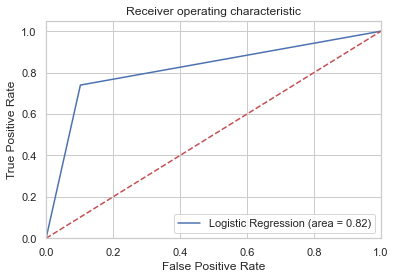

In [142]:
logit_roc_auc = roc_auc_score(y_train, preds)
fpr, tpr, thresholds = roc_curve(y_train, preds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [143]:
print(log_reg.coef_)

[[-0.7893 -0.0168  0.01    0.7982  0.389   0.2649  1.221   1.8889  0.5905
  -0.0172 -0.0739  0.0253  0.3827  0.      0.      1.307   0.3989 -1.7631
   1.0404 -0.5312 -0.4825]]


In [189]:
log_coef =(log_reg.intercept_.round(3) , log_reg.coef_.round(5))

In [190]:
log_coef

(array([1.461]),
 array([[-0.7893, -0.0168,  0.01  ,  0.7982,  0.389 ,  0.2649,  1.221 ,
          1.8889,  0.5905, -0.0172, -0.0739,  0.0253,  0.3827,  0.    ,
          0.    ,  1.307 ,  0.3989, -1.7631,  1.0404, -0.5312, -0.4825]]))

In [191]:
for i in log_coef :
    print (i)

[1.461]
[[-0.7893 -0.0168  0.01    0.7982  0.389   0.2649  1.221   1.8889  0.5905
  -0.0172 -0.0739  0.0253  0.3827  0.      0.      1.307   0.3989 -1.7631
   1.0404 -0.5312 -0.4825]]


In [147]:
training_df.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Cabin A', 'Cabin B', 'Cabin C',
       'Cabin D', 'Cabin E', 'Cabin F', 'Cabin G', 'Cabin T', 'Embarked S',
       'Embarked C', 'Pclass_2', 'Pclass_3', 'Master', 'Miss', 'Mr', 'Mrs',
       'Special', 'FamilySize'],
      dtype='object')

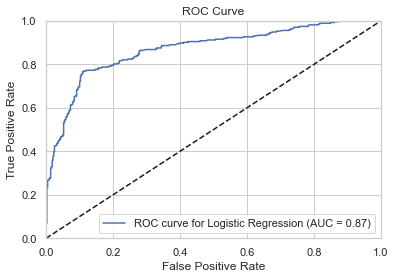

In [148]:
plt_roc_curve("Logistic Regression",log_reg,x_test= x_train, y_test=y_train,has_proba=True)

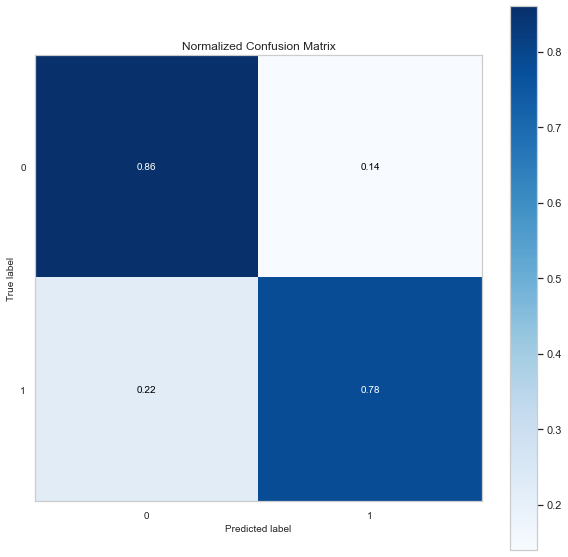

In [149]:
skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True, figsize=(10,10))

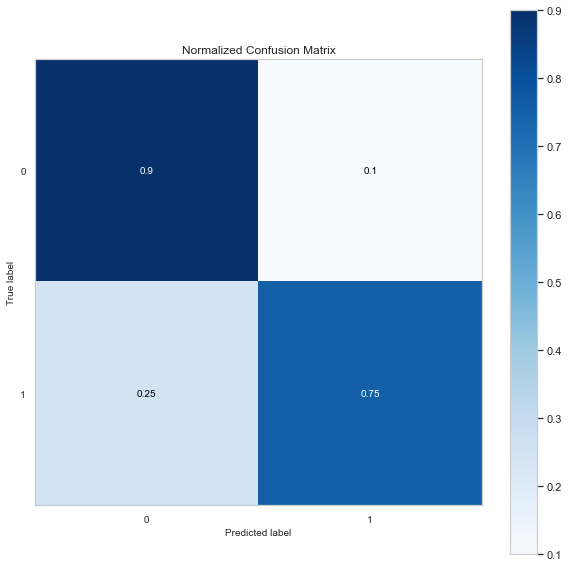

In [150]:
skplt.metrics.plot_confusion_matrix(y_train, log_reg.predict(x_train),normalize=True, figsize=(10,10))

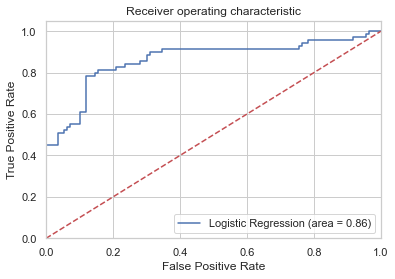

In [151]:
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

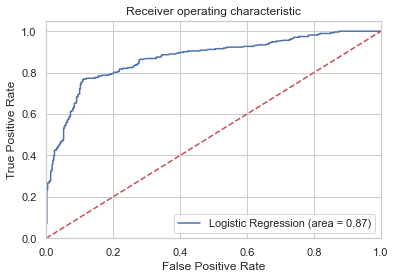

In [152]:
logit_roc_auc =roc_auc_score(y_train, log_reg.predict_proba(x_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Area Under Curve: 0.83


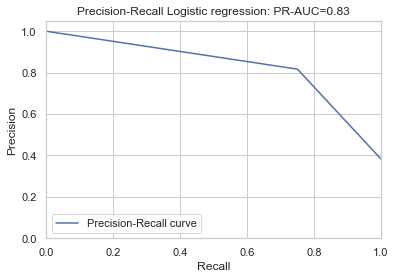

In [153]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_train, log_reg.predict(x_train))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

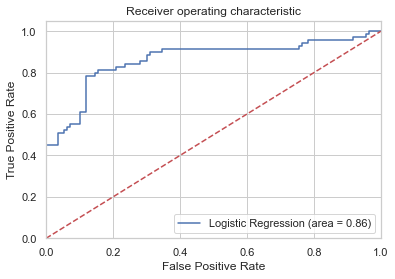

In [154]:
logit_roc_auc =roc_auc_score(y_test, log_reg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Area Under Curve: 0.82


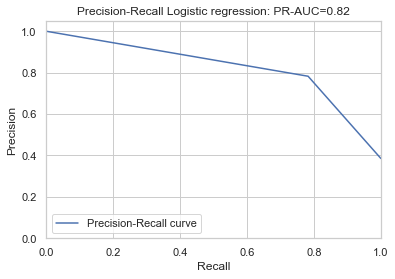

In [155]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, log_reg.predict(x_test))
area = auc(recall, precision)
print ("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

In [156]:
print(classification_report(y_train, log_reg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       439
           1       0.82      0.75      0.78       273

    accuracy                           0.84       712
   macro avg       0.83      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [157]:
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Create Random Forest Classifier

<div class="alert alert-block alert-success">
    <b>Random Forest Classifier</b>: is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.RandomForestClassifier</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
</div>

 param_r = {'bootstrap': True,
  'max_depth': 20,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 125,
    'oob_score' : True     }

In [158]:
Randreg = RandomForestClassifier(bootstrap= True,
  criterion= 'entropy',
  max_depth= 15,
  max_features= 'auto',
  min_samples_split= 8,
  n_estimators= 50,
  oob_score=True)

# Fit data on to the model
Randreg.fit(x_train, y_train)

# Predict
y_predicted_Randreg = Randreg.predict(x_train)

In [159]:
print("Accuracy: " + str(acc_score(Randreg,x_test= x_train, y_test= y_train)))
confusion_matrix_model(Randreg,x_test= x_train, y_test= y_train)

Accuracy: 0.811878262582488


,Predicted Dead,Predicted Survived
Actual Dead,0.94,0.06
Actual Survived,0.19,0.81


In [193]:
print("Accuracy: " + str(acc_score(Randreg,x_test= x_test, y_test= y_test)))
confusion_matrix_model(Randreg,x_test= x_test, y_test= y_test)

Accuracy: 0.8206349206349206


,Predicted Dead,Predicted Survived
Actual Dead,0.88,0.12
Actual Survived,0.25,0.75


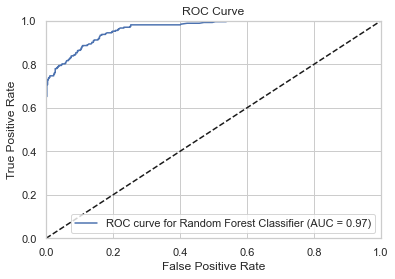

In [160]:
plt_roc_curve("Random Forest Classifier",Randreg,x_test= x_train, y_test= y_train,has_proba=True)

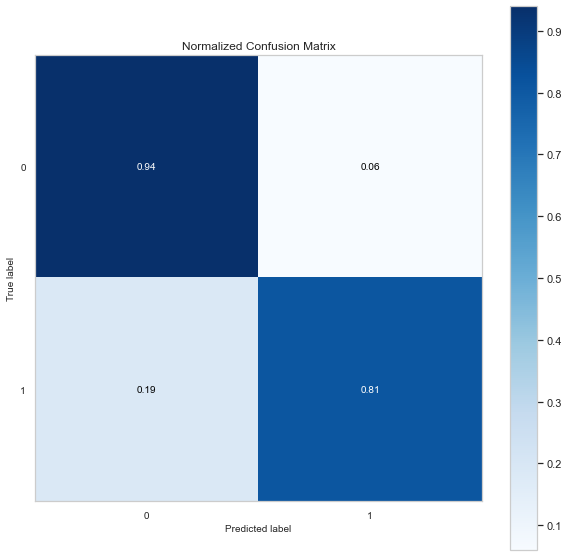

In [161]:
skplt.metrics.plot_confusion_matrix(y_trainc, Randreg.predict(x_train),normalize=True, figsize=(10,10))

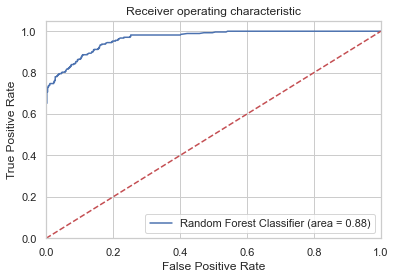

In [162]:
logit_roc_auc = roc_auc_score(y_train, Randreg.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, Randreg.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# predict test data

In [163]:

# Predict test
y_predicted_Randreg = Randreg.predict(x_test)

In [164]:
print("Accuracy: " + str(acc_score(Randreg,x_test= x_test, y_test= y_test)))
confusion_matrix_model(Randreg,x_test= x_test, y_test= y_test)

Accuracy: 0.843015873015873


,Predicted Dead,Predicted Survived
Actual Dead,0.88,0.12
Actual Survived,0.25,0.75


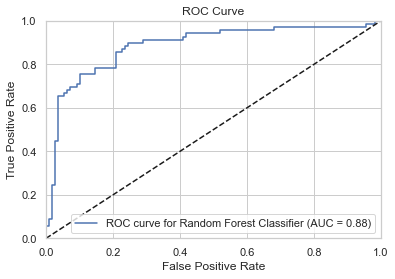

In [165]:
plt_roc_curve("Random Forest Classifier",Randreg,x_test= x_test, y_test= y_test,has_proba=True)

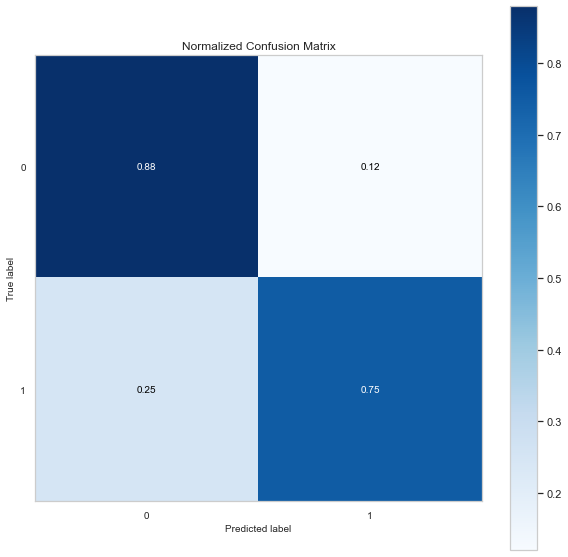

In [166]:
skplt.metrics.plot_confusion_matrix(y_test, Randreg.predict(x_test),normalize=True, figsize=(10,10))

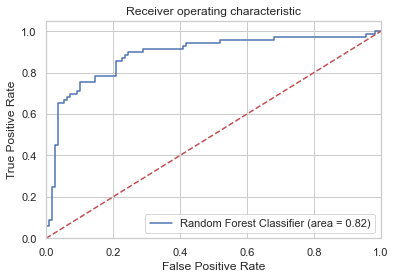

In [167]:
logit_roc_auc = roc_auc_score(y_test, Randreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, Randreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [168]:
Randreg_oob_score= Randreg.oob_score_
Randreg_oob_score

0.8146067415730337

In [194]:

print(classification_report(y_train, Randreg.predict(x_train)))
print(classification_report(y_test, Randreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       439
           1       0.89      0.81      0.85       273

    accuracy                           0.89       712
   macro avg       0.89      0.88      0.88       712
weighted avg       0.89      0.89      0.89       712

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Automatically created module for IPython interactive environment


C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have O

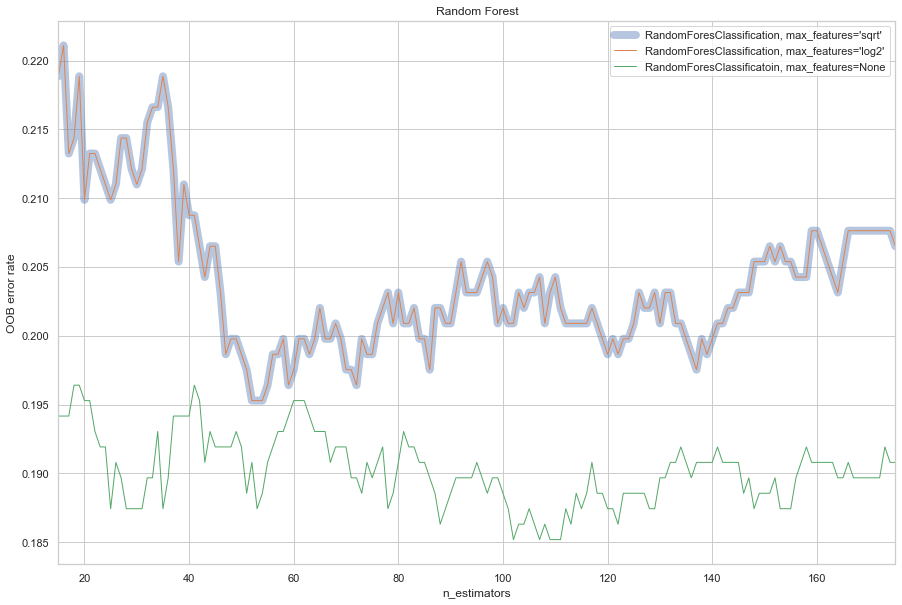

In [169]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

#fig size
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForesClassification, max_features='sqrt'",
       RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForesClassification, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForesClassificatoin, max_features=None",
        RandomForestClassifier(warm_start=True, max_features= None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    al= 1
    ln = 1
    if label == "RandomForesClassification, max_features='sqrt'":
        ln = 8.0
        al = 0.4
       
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label, alpha= al, linewidth = ln)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.title("Random Forest")
plt.show()

In [241]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

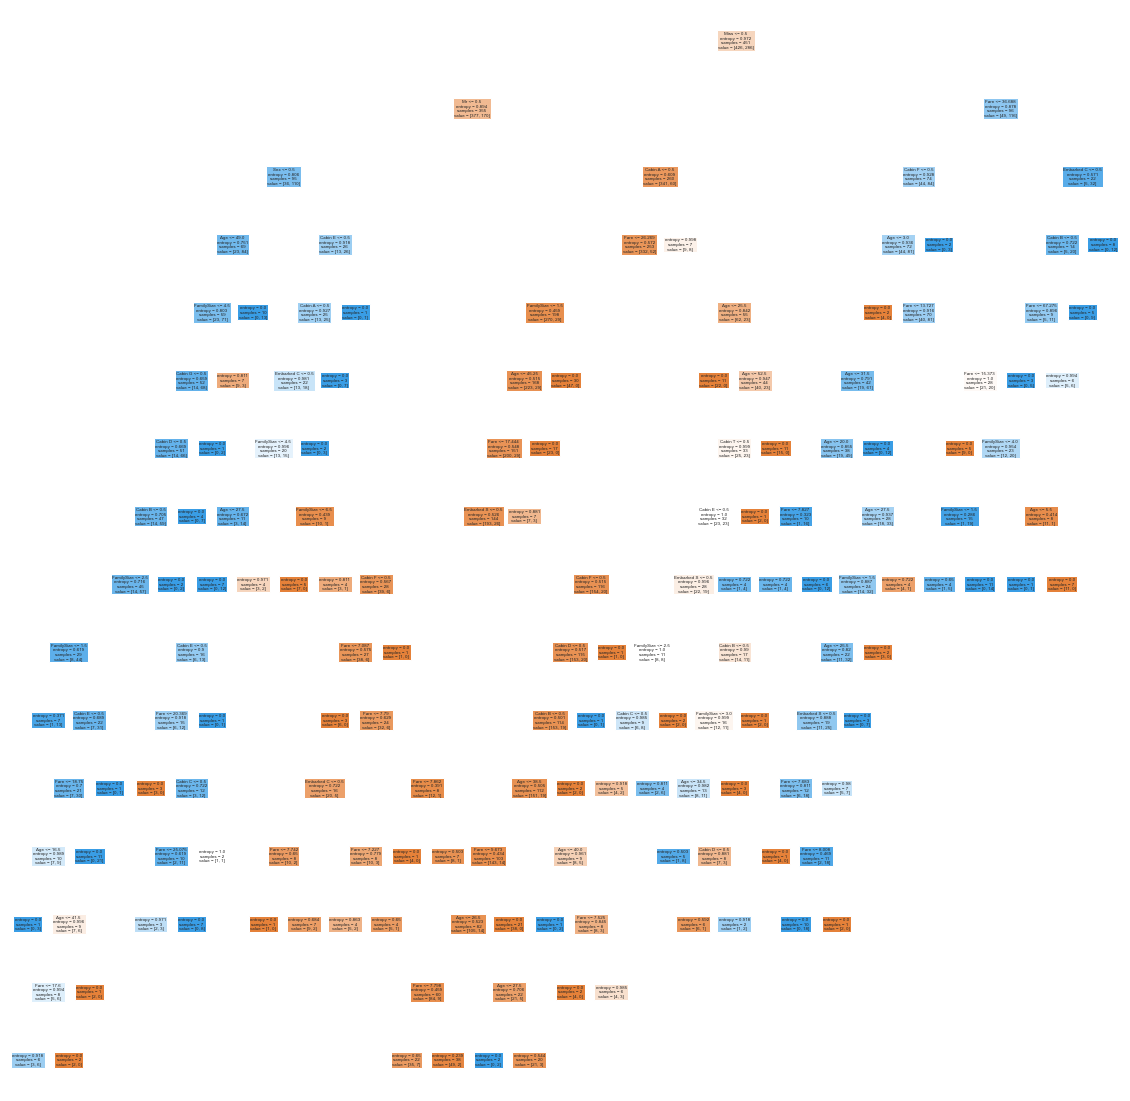

In [243]:
plt.figure(figsize=(20,20))
_= tree.plot_tree(Randreg.estimators_[0], feature_names=x.columns, filled=True)

## Create Extra-Trees Classifier

<div class="alert alert-block alert-success">
    <b>Extra-Trees Classifier</b>: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.ExtraTreesClassifier</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
</div>

In [170]:
ETreg = ExtraTreesClassifier(bootstrap= True,
  criterion= 'gini',
  max_depth= 10,
  max_features= 'auto',
  min_samples_split= 2,
  n_estimators= 75,
     oob_score= True)

# Fit data on to the model
ETreg.fit(x_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(x_train)

In [171]:
print("Accuracy: " + str(acc_score(ETreg,x_test= x_train, y_test= y_train)))
ETacc=acc_score(ETreg, x_test= x_train, y_test= y_train)
confusion_matrix_model(ETreg,x_test= x_train, y_test= y_train)

Accuracy: 0.8273515217177188


,Predicted Dead,Predicted Survived
Actual Dead,0.91,0.09
Actual Survived,0.18,0.82


In [199]:
print("Accuracy: " + str(acc_score(ETreg,x_test= x_test, y_test= y_test)))
ETacc= acc_score(ETreg, x_test= x_test, y_test= y_test)
confusion_matrix_model(ETreg,x_test= x_test, y_test= y_test)

Accuracy: 0.8153968253968253


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.22,0.78


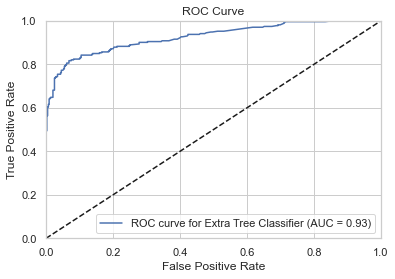

In [200]:
plt_roc_curve("Extra Tree Classifier",ETreg, x_test= x_train, y_test= y_train,has_proba=True)

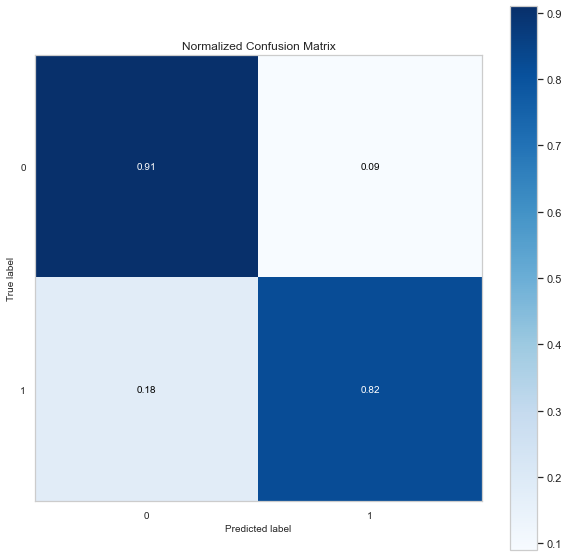

In [173]:
skplt.metrics.plot_confusion_matrix(y_train, ETreg.predict(x_train),normalize=True, figsize=(10,10))

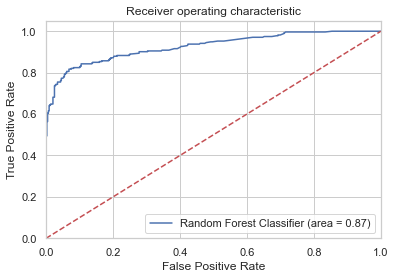

In [174]:
logit_roc_auc = roc_auc_score(y_train, ETreg.predict(x_train))
fpr, tpr, thresholds = roc_curve(y_train, ETreg.predict_proba(x_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

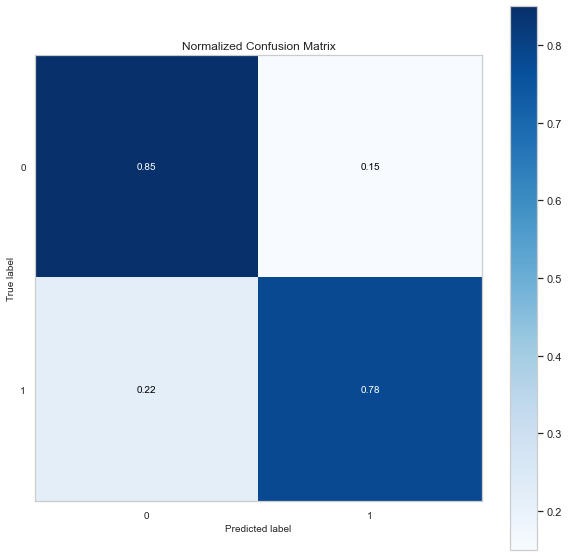

In [175]:
skplt.metrics.plot_confusion_matrix(y_test, ETreg.predict(x_test),normalize=True, figsize=(10,10))

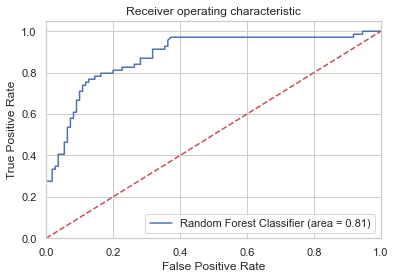

In [176]:
logit_roc_auc = roc_auc_score(y_test, ETreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, ETreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [177]:
ETreg_obb_score = ETreg.oob_score_

In [202]:
ETreg_obb_score

0.8188202247191011

In [201]:
print(classification_report(y_train, ETreg.predict(x_train)))
print(classification_report(y_test,ETreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       439
           1       0.86      0.82      0.84       273

    accuracy                           0.88       712
   macro avg       0.87      0.87      0.87       712
weighted avg       0.88      0.88      0.88       712

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Automatically created module for IPython interactive environment


C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Husein Adenwala\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have O

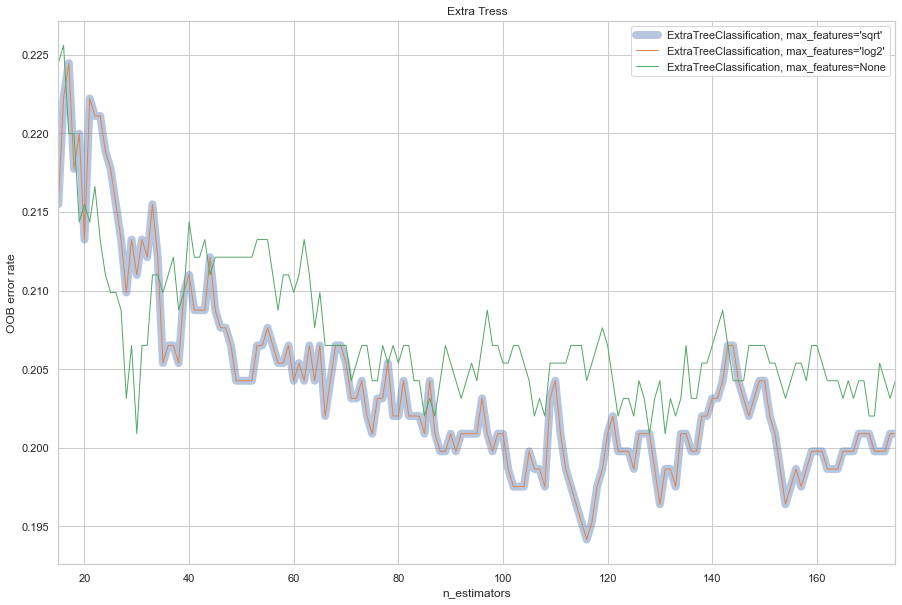

In [179]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

#fig size
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("ExtraTreeClassification, max_features='sqrt'",
       ExtraTreesClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE,bootstrap=True)),
    ("ExtraTreeClassification, max_features='log2'",
         ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,bootstrap=True)),
    ("ExtraTreeClassification, max_features=None",
         ExtraTreesClassifier(warm_start=True, max_features= None,
                               oob_score=True,
                               random_state=RANDOM_STATE,bootstrap=True))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    al= 1
    ln = 1
    if label == "ExtraTreeClassification, max_features='sqrt'":
        ln = 8.0
        al = 0.4
       
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label, alpha= al, linewidth = ln)

    

                    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.title("Extra Tress")
plt.show()

### Summary Statistics - Logistic Regression / Random Forrest Classifier / Extra Trees Classifier

Classifiers=["Logistic Regression","Random Forrest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x) for x in [log_reg,Randreg,ETreg]]
auc_scores_prob=[aucscore(x,has_proba=True) for x in [log_reg,Randreg, ETreg]]
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

In [180]:
# train data 

In [205]:
Classifiers=["Logistic Regression","Random Forrest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x,x_test=x_train,y_test=y_train) for x in [log_reg,Randreg, ETreg]]
auc_scores_prob=[aucscore(x,x_test= x_train, y_test= y_train,has_proba=True) for x in [log_reg,Randreg, ETreg]]
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.832966,0.869968
1,Random Forrest Classifier,0.813306,0.965239
2,Extra Trees Classifier,0.825933,0.926085


In [206]:
# test data

In [207]:
Classifiers=["Logistic Regression","Random Forrest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x,x_test=x_test,y_test=y_test) for x in [log_reg,Randreg, ETreg]]
auc_scores_prob=[aucscore(x,x_test= x_test, y_test= y_test,has_proba=True) for x in [log_reg,Randreg, ETreg]]
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.776667,0.861265
1,Random Forrest Classifier,0.820635,0.884190
2,Extra Trees Classifier,0.826667,0.882279


In [184]:
obbscore= [{'Random_forest Classifier': Randreg_oob_score,
          'Extra Tree classifier': ETreg_obb_score}]

In [195]:
odf = pd.DataFrame(obbscore, index= ['oob_score'])
odf

,Random_forest Classifier,Extra Tree classifier
oob_score,0.814607,0.81882


In [234]:
rc = list(Randreg.feature_importances_.round(3))

In [238]:
ec =list(ETreg.feature_importances_.round(3))

In [222]:
lc =x.columns

In [236]:
res = [i +" - " +str(j) for i, j in zip(lc, rc)]

In [237]:
res

['Sex - 0.116',
 'Age - 0.171',
 'Fare - 0.233',
 'Cabin A - 0.005',
 'Cabin B - 0.014',
 'Cabin C - 0.012',
 'Cabin D - 0.014',
 'Cabin E - 0.025',
 'Cabin F - 0.005',
 'Cabin G - 0.003',
 'Cabin T - 0.001',
 'Embarked S - 0.018',
 'Embarked C - 0.015',
 'Pclass_2 - 0.0',
 'Pclass_3 - 0.0',
 'Master - 0.011',
 'Miss - 0.044',
 'Mr - 0.166',
 'Mrs - 0.032',
 'Special - 0.006',
 'FamilySize - 0.109']

In [240]:
rest = [i +" - " +str(j) for i, j in zip(lc, ec)]
rest

['Sex - 0.154',
 'Age - 0.083',
 'Fare - 0.097',
 'Cabin A - 0.008',
 'Cabin B - 0.023',
 'Cabin C - 0.016',
 'Cabin D - 0.016',
 'Cabin E - 0.04',
 'Cabin F - 0.008',
 'Cabin G - 0.002',
 'Cabin T - 0.0',
 'Embarked S - 0.03',
 'Embarked C - 0.027',
 'Pclass_2 - 0.0',
 'Pclass_3 - 0.0',
 'Master - 0.016',
 'Miss - 0.07',
 'Mr - 0.237',
 'Mrs - 0.071',
 'Special - 0.009',
 'FamilySize - 0.091']

### HyperParameter Tuning with GridSearchCV

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.GridSearchCV</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

#### HyperParameter Search 

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LogisticRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
</div>

In [2157]:
parameters = {"class_weight": ["None", "balanced"], 
              "max_iter": [25,50,75,100],
              "penalty": ["l1", "l2", "elasticnet", "none"], 
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
             }

In [2158]:
grid_cv = GridSearchCV(log_reg, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

In [2159]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

Our optimized Logistic Regression model is:


LogisticRegression(class_weight='None', max_iter=50, penalty='none')

#### Build Logistic Regression Model with Parameter Tuning

In [76]:
logreg_clf_GSCV = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=75,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_clf_GSCV.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=75,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
print("Accuracy: " + str(acc_score(logreg_clf_GSCV)))
confusion_matrix_model(logreg_clf_GSCV)

Accuracy: 0.7865753964345514


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.26,0.74


bootstrap= True,
  criterion= 'entropy',
  max_depth= 15,
  max_features= 'auto',
  min_samples_split= 8,
  n_estimators= 50

bootstrap= True,
  criterion= 'gini',
  max_depth= 10,
  max_features= 'auto',
  min_samples_split= 2,
  n_estimators= 75

In [212]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Logistic', 'RandomForest', 'ExtraTree']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LogisticRegression(max_iter=75), 
              RandomForestClassifier(bootstrap= True,
  criterion= 'entropy',
  max_depth= 15,
  max_features= 'auto',
  min_samples_split= 8,
  n_estimators= 50),
              ExtraTreesClassifier(bootstrap= True,
  criterion= 'gini',
  max_depth= 10,
  max_features= 'auto',
  min_samples_split= 2,
  n_estimators= 75)
         
              ]

In [213]:
model_data= training_df.values

In [214]:

# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))
cv_r2 =np.zeros((N_FOLDS, len(names)))
# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    x_train = model_data[train_index, 1:model_data.shape[1]]
    x_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    #index_r = 0
    for name, reg_model in zip(names, regressors):
        reg_model.fit(x_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(x_test)
        fold_method_result = accuracy_score(y_test, y_test_predict)
        #R_squared = reg_model.score(X_test,y_test)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        
        #cv_r2[index_r, index_for_method]= R_squared
        index_for_method += 1
        #index_r += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names
cv_r2df= pd.DataFrame(cv_r2)
cv_r2df.columns = names
print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',      'in standardized units (mean 0, standard deviation 1)\n', '\nMethod    accuracy score', sep = '')    
print(cv_results_df.mean())
print(cv_results_df)


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [ ]:
RandomForestClassifier(criterion=)

In [ ]:
# hyperparameter

In [2122]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {"n_estimators": [50,75,100,125],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth": [5,10,15,20],
            "min_samples_split" : [2,4,8,10],
            "bootstrap": [True, False],
            'criterion': ['gini', 'entropy']
        }
    },
    'ExtraTree': {
        'model': ExtraTreesClassifier(),
        'params' : {"n_estimators" : [50,75,100,125],
             "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth": [5,10,15,20],
            "min_samples_split" : [2,4,8,10],
              "bootstrap": [True, False],
                      'criterion': ['gini', 'entropy']
            
        }
    }     
}

In [2131]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.832981,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
1,ExtraTree,0.830458,"{'bootstrap': True, 'criterion': 'gini', 'max_..."


In [2132]:
list(df['best_params'])

[{'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 15,
  'max_features': 'auto',
  'min_samples_split': 8,
  'n_estimators': 50},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 75}]

In [2126]:
clf.base_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'base_estimator_'